In [1]:
!pip install tensorflow
!pip install keras_preprocessing
!pip install keras
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from keras.models import Model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_DIR = 'drive/MyDrive/images/train'
TEST_DIR = 'drive/MyDrive/images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
import random

# Function to create DataFrame containing limited number of image paths and labels
def create_limited_dataframe(dir, max_images_per_label):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_images = [os.path.join(dir, label, imagename) for imagename in os.listdir(os.path.join(dir, label))]
        random.shuffle(label_images)  # Shuffle the images for randomness
        label_images = label_images[:max_images_per_label]  # Select a limited number of images per label
        image_paths.extend(label_images)
        labels.extend([label] * len(label_images))
        print(f"{label}: {len(label_images)} images completed")
    return image_paths, labels

# Define the maximum number of images per label
MAX_IMAGES_PER_LABEL = 1000

# Create limited DataFrames for train and test data
train = pd.DataFrame()
train['image'], train['label'] = create_limited_dataframe(TRAIN_DIR, MAX_IMAGES_PER_LABEL)

test = pd.DataFrame()
test['image'], test['label'] = create_limited_dataframe(TEST_DIR, MAX_IMAGES_PER_LABEL)

neutral: 1000 images completed
sad: 1000 images completed
happy: 1000 images completed
surprise: 1000 images completed
angry: 1000 images completed
angry: 960 images completed
happy: 1000 images completed
surprise: 797 images completed
neutral: 1000 images completed
sad: 1000 images completed


In [6]:
from tqdm.notebook import tqdm

In [7]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [8]:
train_features = extract_features(train['image'])

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
test_features = extract_features(test['image'])

In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [15]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
import tensorflow as tf

In [18]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 60, validation_data = (x_test,y_test))

Epoch 1/60
40/40 [==============================] - 12s 91ms/step - loss: 1.7113 - accuracy: 0.1982 - val_loss: 1.6863 - val_accuracy: 0.2102
Epoch 2/60
40/40 [==============================] - 2s 59ms/step - loss: 1.6382 - accuracy: 0.1982 - val_loss: 1.6750 - val_accuracy: 0.2018
Epoch 3/60
40/40 [==============================] - 3s 64ms/step - loss: 1.6327 - accuracy: 0.2010 - val_loss: 1.6413 - val_accuracy: 0.1675
Epoch 4/60
40/40 [==============================] - 2s 56ms/step - loss: 1.6260 - accuracy: 0.2028 - val_loss: 1.6205 - val_accuracy: 0.2102
Epoch 5/60
40/40 [==============================] - 2s 62ms/step - loss: 1.6162 - accuracy: 0.2290 - val_loss: 1.6149 - val_accuracy: 0.2117
Epoch 6/60
40/40 [==============================] - 2s 56ms/step - loss: 1.6004 - accuracy: 0.2376 - val_loss: 1.5957 - val_accuracy: 0.2350
Epoch 7/60
40/40 [==============================] - 2s 57ms/step - loss: 1.5961 - accuracy: 0.2486 - val_loss: 1.6017 - val_accuracy: 0.2167
Epoch 8/60
4

In [19]:
label = ['angry','happy','neutral','sad','surprise']

In [20]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 17ms/step
model prediction is  angry


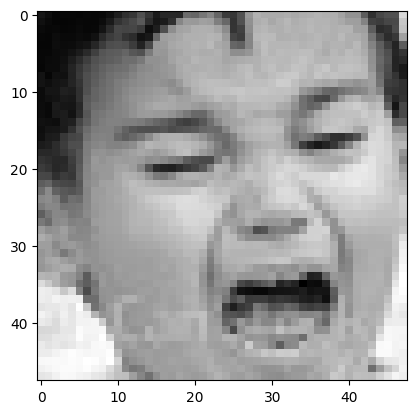

In [23]:
image = 'drive/MyDrive/images/train/angry/24638.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 68ms/step
model prediction is  happy


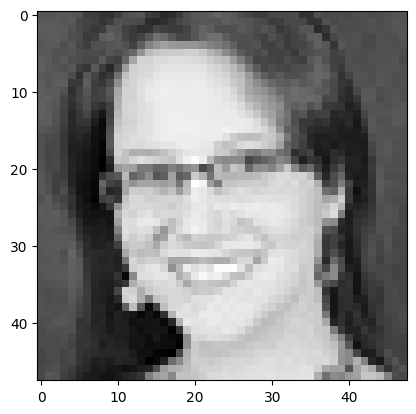

In [ ]:
image = 'drive/MyDrive/images/test/surprise/21299.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 60ms/step
model prediction is  surprise


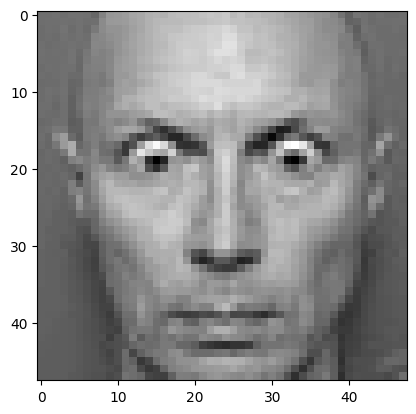

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')